In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('titanic_data.csv')

Imported the whole dataset into a pandas dataframe, df.

### Overview the dataframe

In [7]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

We see that there are missing valus in Age. Let's fill the missing age values with the median age.

In [8]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

In [9]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [10]:
print(median_age)

28.0


### Survival stats based on age

#### Percentage of survival for each age group

In [36]:
age_groups = df.groupby( pd.cut(df['Age'], [0,10, 20, 30, 40, 50, 60, 70, 80, pd.np.inf]) )
survival_rates = age_groups['Survived'].mean().dropna() * 100
print(survival_rates)

Age
(0, 10]     59.375000
(10, 20]    38.260870
(20, 30]    33.415233
(30, 40]    44.516129
(40, 50]    38.372093
(50, 60]    40.476190
(60, 70]    23.529412
(70, 80]    20.000000
Name: Survived, dtype: float64


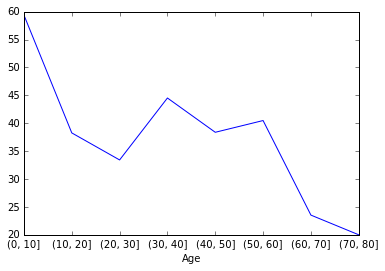

In [37]:
survival_rates.plot()

So, the percentage of survial for children was the highest, followed by the middle aged.

In [39]:
survived_age_group = df[df['Survived']==1].groupby( pd.cut(df[df['Survived']==1]['Age'], [0,10,20,30,40,50,60,70,80,pd.np.inf]))
survived_age_group_count = survived_age_group['PassengerId'].count()
print(survived_age_group_count)

Age
(0, 10]       38
(10, 20]      44
(20, 30]     136
(30, 40]      69
(40, 50]      33
(50, 60]      17
(60, 70]       4
(70, 80]       1
(80, inf]      0
Name: PassengerId, dtype: int64


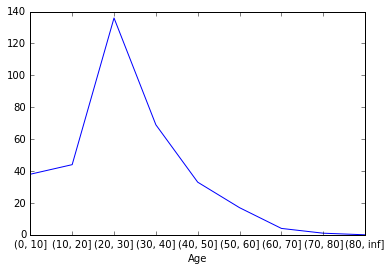

In [40]:
survived_age_group_count.plot()

So, in the total survived population, the most were of the age group 20-30.

### Survival stats based on sex

In [42]:
survival_rates_sex = df.groupby('Sex')['Survived'].mean() * 100
print(survival_rates_sex)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


So, 74.203% females survived, while only 18.89% males did.

In [44]:
survived_sex_count = df[df['Survived']==1]['Sex']
survived_sex_count = survived_sex_count.value_counts(True) * 100
print(survived_sex_count)

female    68.128655
male      31.871345
Name: Sex, dtype: float64


On the other hand, in the final survived population, 68.128% were females and 31.87% were males.

### Survival stats based on passenger class

In [45]:
survival_rates_Pclass = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_rates_Pclass)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


The rate of survival for the 1st class was 62.96%, for 2nd class was 47.28%, and for the 3rd class was 24.23%.

In [46]:
survived_Pclass_count = df[df['Survived']==1]['Pclass']
survived_Pclass_count = survived_Pclass_count.value_counts(True) * 100
print(survived_Pclass_count)

1    39.766082
3    34.795322
2    25.438596
Name: Pclass, dtype: float64


However, in the final survived population, 39.76% were from the 1st class, 34.79% were from 2nd class and 25.43% were from the 3rd class.

### Survival stats based on family

Lets add a new column that shows if the person has any family in the ship.

In [47]:
df['has_family'] = 0
df['has_family'][df['SibSp'] + df['Parch'] > 0] = 1

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [50]:
total_families = df['has_family'].value_counts(True) * 100
print(total_families)

0    60.26936
1    39.73064
Name: has_family, dtype: float64


So, 39.73% of the passengers had families in the ship.

In [51]:
survival_rates_family = df.groupby('has_family')['Survived'].mean() * 100
print(survival_rates_family)

has_family
0    30.353818
1    50.564972
Name: Survived, dtype: float64


So, almost 50% of the people with some family survived, where as only 30% of the people that were traveling without family survied.